Деревья для задач классификации 

In [33]:
import pandas as pd 
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import os
import graphviz
import os

In [34]:
os.chdir('C:/JUPITER/SHAD BASE/06')

In [35]:
df=pd.read_csv('Credit.csv', sep=';',encoding='1251' )

In [36]:
df

,кредит,клаcс,з_плата,возраст,кр_карта
0,1,2,2,2,1
1,0,2,1,2,0
2,0,4,1,1,1
3,1,2,2,2,0
4,1,3,2,1,0
5,1,1,2,1,1
6,1,2,2,3,0
7,0,2,2,1,0
8,0,2,1,1,0
9,0,3,1,1,0


In [37]:
y=df[u'кредит']
X=df.drop(u'кредит', axis=1)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_iris

model = DecisionTreeClassifier(random_state=42,
                                # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=5,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=5,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=5,
                               # минимальное значение дельты impurity
                               # min_impurity_decrease=0,
                               # веса для классов (можно дополнительно штрафовать за ошибку в нужных классах).
                               # поддерживает опцию 'balanced'.
                               class_weight=None,
                               # предварительная сортировка.
                               # ускоряет обучение на данных небольшого размера или с ограниченной глубиной дерева.
                               # иначе замедляет обучение.
                               presort=False
                              )


In [39]:
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [40]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from subprocess import call
export_graphviz(model, out_file='tree.dot', 
                class_names = None,
                rounded = True, proportion = True, 
                precision = 2, filled = True)

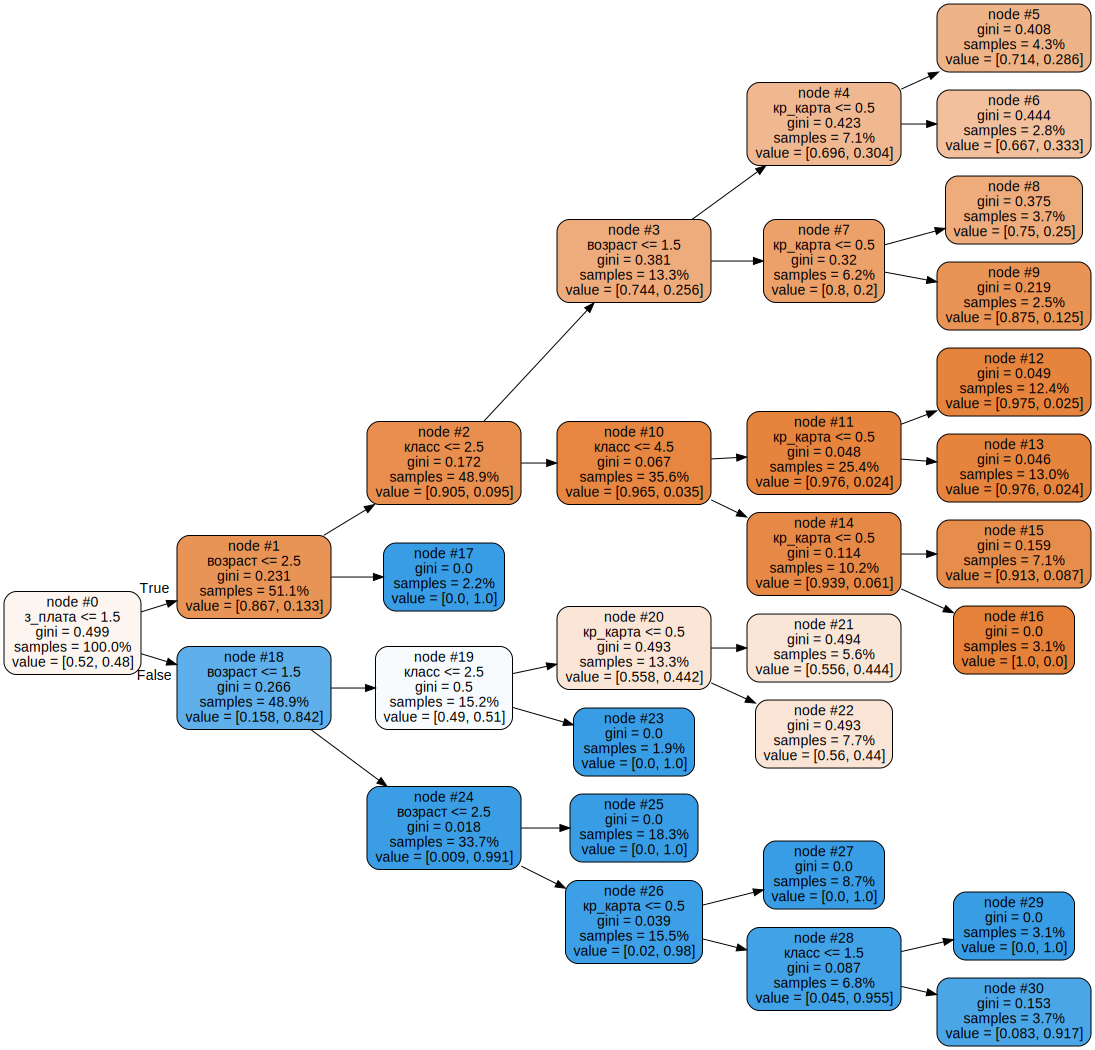

In [41]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(model, out_file=None, class_names = None, rounded = True, proportion = True, 
                precision = 3, filled = True, node_ids=True, label='all', rotate=True, impurity=True, feature_names=X.columns))

Модель позволяет оценить ценность каждой фичи в смысле её эффективности для разбиения (Gini importance). Эта оценка считает для каждой из фич сумму дельт по impurity (нормированную), полученных при разбиениях по этой фиче. Для этого у модели есть метод feature_importances_.

In [42]:
pd.DataFrame({'feature': X.columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
1,з_плата,0.706473
2,возраст,0.234163
0,клаcс,0.056472
3,кр_карта,0.002892


In [43]:
# Предсказание класса для новых элементов
new_item = [0, 0, 1, 0]
model.predict([new_item])

array([0], dtype=int64)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    # доля объёма тестового множества
                                                    test_size=0.2)
# обучаем модель на тренировочных данных
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [45]:
# Строим предсказание модели на тестовом множестве
y_pred = model.predict(X_test)

In [46]:
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

Оценка качества классификатора

In [47]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1
0,27,3
1,10,25


In [48]:
# Точность, полноту и F1-меру можно посчитать при помощи встроенной функции sklearn.metrics.classification_report.
print (metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        37
           1       0.71      0.89      0.79        28

    accuracy                           0.80        65
   macro avg       0.81      0.81      0.80        65
weighted avg       0.82      0.80      0.80        65



Деревья решений для задач регрессии

Случайный лес

In [69]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42,
                               # опции, относящиеся к отдельным деревьям такаие же, как в tree.DecisionTreeClassifier
                               # число деревьев в лесу
                               n_estimators=30,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               max_depth=5,
                               # Вычислять out-of-bag ошибку
                               oob_score=True,
                               # использовать результаты предыдущего вызова и нарастить предыдущий лес 
                               warm_start=False,
                               # веса классов для балансировки обучения
                               class_weight=None
                               
                              )

In [70]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [71]:
y_pred = model.predict(X_test)
print (metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        39
           1       0.74      1.00      0.85        26

    accuracy                           0.86        65
   macro avg       0.87      0.88      0.86        65
weighted avg       0.90      0.86      0.86        65



In [72]:
print ('Out-of-bag score: {0}'.format(model.oob_score_) )

Out-of-bag score: 0.875968992248062


In [73]:
pd.DataFrame({'feature': X.columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
1,з_плата,0.451255
2,возраст,0.421994
0,клаcс,0.109135
3,кр_карта,0.017616
